In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [24]:
data = pd.read_csv('data.csv')
imputed_data_caliber = pd.read_csv('imputed_data_caliber_c.csv')
imputed_data_mice = pd.read_csv('imputed_data_mice_c.csv')
imputed_data_mixgb = pd.read_csv('imputed_data_mixgb.csv')
imputed_data_missforest = pd.read_csv('imputed_data_missforest.csv')
data_missing = pd.read_csv('data_missing.csv')
data_to_use = data.drop(['Y', 'class_label', 'norm4', 'norm6', 'norm8'], axis=1)
data_missing_imputed = data_missing.fillna(data_missing.mean())
data_missing_imputed = data_missing_imputed.drop(['Y', 'class_label', 'norm4', 'norm6', 'norm8'], axis=1)

In [23]:
train_y = data_missing['Y']
label_y = data_missing['class_label']

,Y,norm1,norm2,norm3,norm4,norm5,norm6,norm7,norm8,bin1,ord1,class_label
0,True,False,False,True,True,True,True,False,True,True,False,True
1,True,False,False,False,True,False,True,True,True,False,True,True
2,True,False,True,True,True,False,True,False,True,True,False,True
3,True,True,True,False,True,True,True,True,True,True,True,True
4,True,False,False,True,True,False,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,False,False,True,True,False,True,True,True,False,True,True
9996,True,True,False,False,True,True,True,False,True,True,False,True
9997,True,True,True,True,True,False,True,False,True,False,True,True
9998,True,False,False,True,True,True,True,False,True,False,True,True


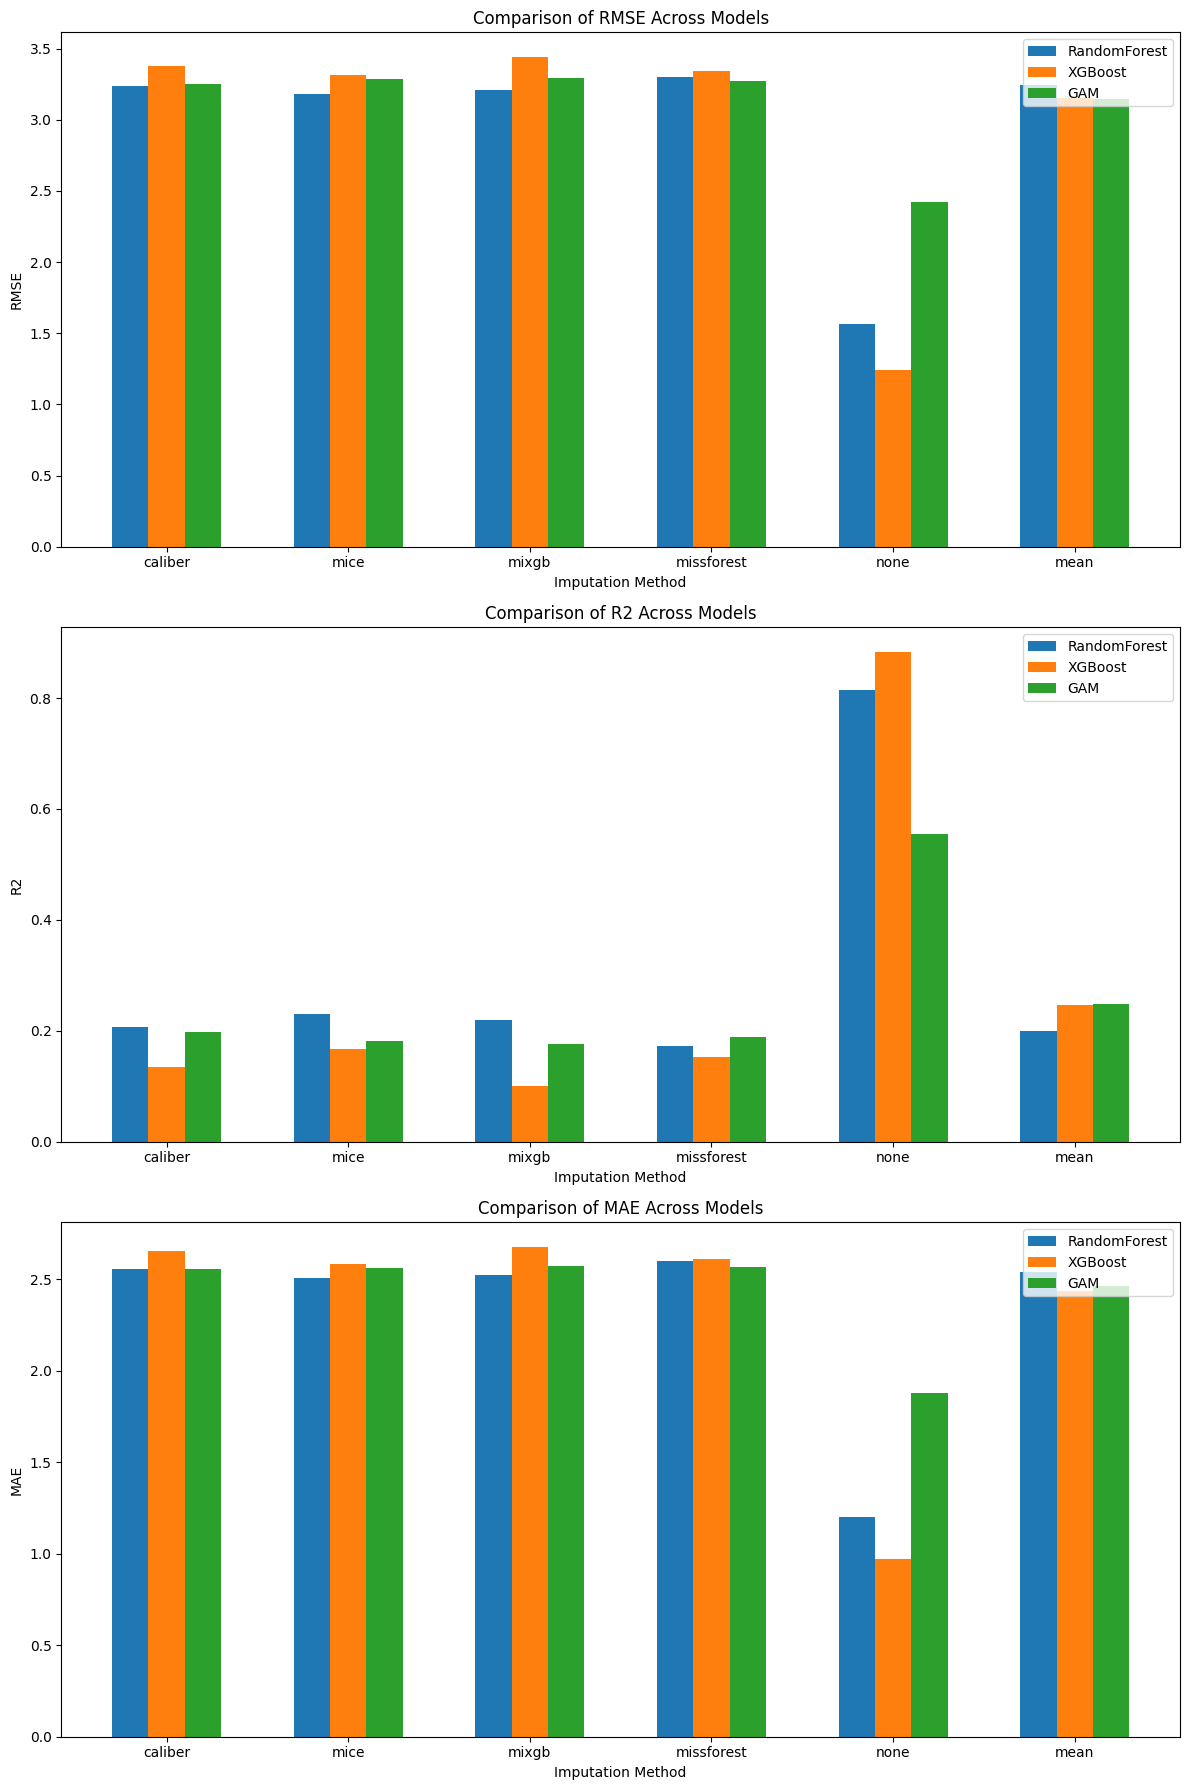

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from pygam import LinearGAM

# Reading the datasets
data = pd.read_csv('data.csv')
data_missing = pd.read_csv('data_missing.csv')
imputed_datasets = {
    'caliber': imputed_data_caliber,
    'mice': imputed_data_mice,
    'mixgb': imputed_data_mixgb,
    'missforest': imputed_data_missforest,
    'none': data_to_use,
    'mean': data_missing_imputed
}


# Target variable
Y = data_missing['Y']

# Function to run models
def run_models(X, Y):
    results = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
    models = {
        'RandomForest': RandomForestRegressor(),
        'XGBoost': XGBRegressor(),
        'GAM': LinearGAM()
    }
    for name, model in models.items():
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        rmse = mean_squared_error(Y_test, predictions, squared=False)
        r2 = r2_score(Y_test, predictions)
        mae = mean_absolute_error(Y_test, predictions)
        results[name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}
    return results

# Store results
all_results = {name: run_models(dataset, Y) for name, dataset in imputed_datasets.items()}

# Visualization
num_methods = len(all_results)
num_models = 3  # RandomForest, XGBoost, GAM
index = np.arange(num_methods)
bar_width = 0.2

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, metric in enumerate(['RMSE', 'R2', 'MAE']):
    for j, model in enumerate(['RandomForest', 'XGBoost', 'GAM']):
        axes[i].bar(index + j*bar_width, [results[model][metric] for results in all_results.values()], bar_width, label=model)

    axes[i].set_xlabel('Imputation Method')
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'Comparison of {metric} Across Models')
    axes[i].set_xticks(index + bar_width)
    axes[i].set_xticklabels(all_results.keys())
    axes[i].legend()

plt.tight_layout()
plt.savefig('comparison_plot.png', dpi=300)
plt.show()



In [33]:
model_results

{'RandomForest': {'RMSE': 3.246175009736425,
  'R2': 0.2005412397128663,
  'MAE': 2.5393564604758656},
 'XGBoost': {'RMSE': 3.149693759411174,
  'R2': 0.24735727943100205,
  'MAE': 2.436761718965966},
 'GAM': {'RMSE': 3.1472580752643333,
  'R2': 0.2485208789859975,
  'MAE': 2.4658421845530385}}

C:\Users\Chungeun Lee\AppData\Local\Temp\ipykernel_11008\1341457269.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_name, 'Metric': metric, 'Value': value}, ignore_index=True)
C:\Users\Chungeun Lee\AppData\Local\Temp\ipykernel_11008\1341457269.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_name, 'Metric': metric, 'Value': value}, ignore_index=True)
C:\Users\Chungeun Lee\AppData\Local\Temp\ipykernel_11008\1341457269.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_n

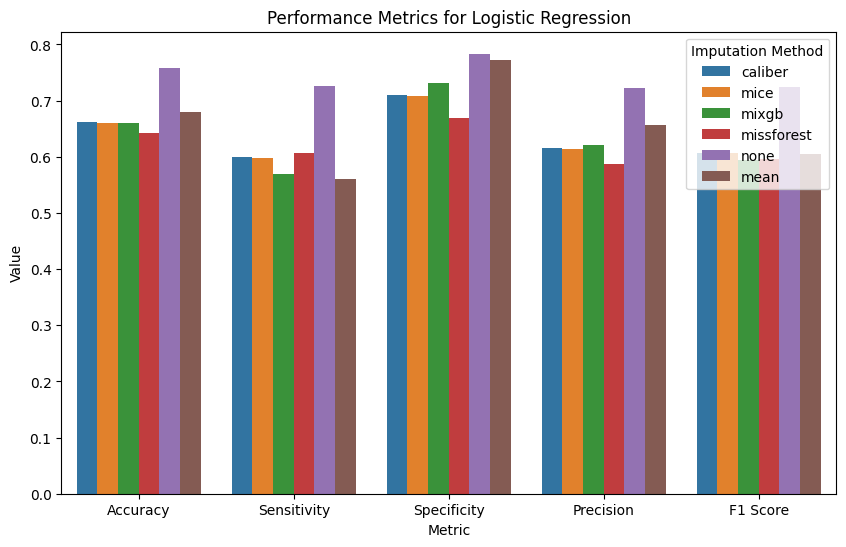

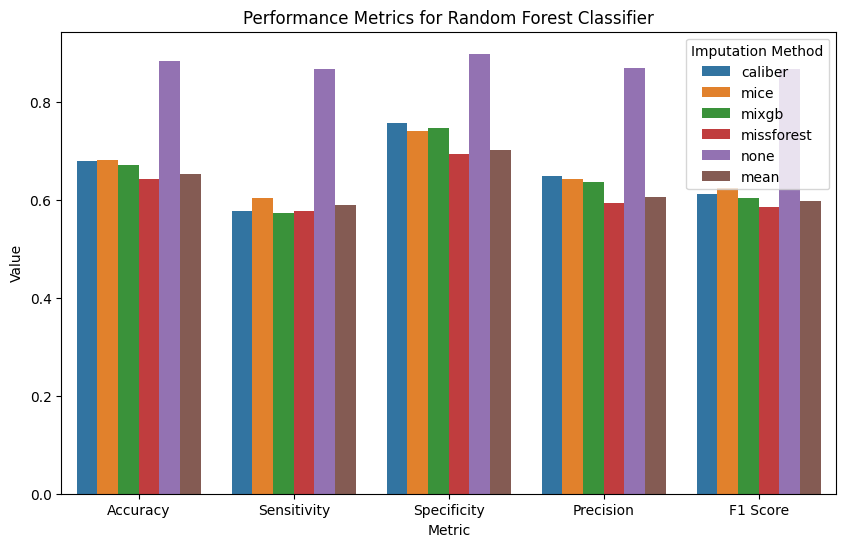

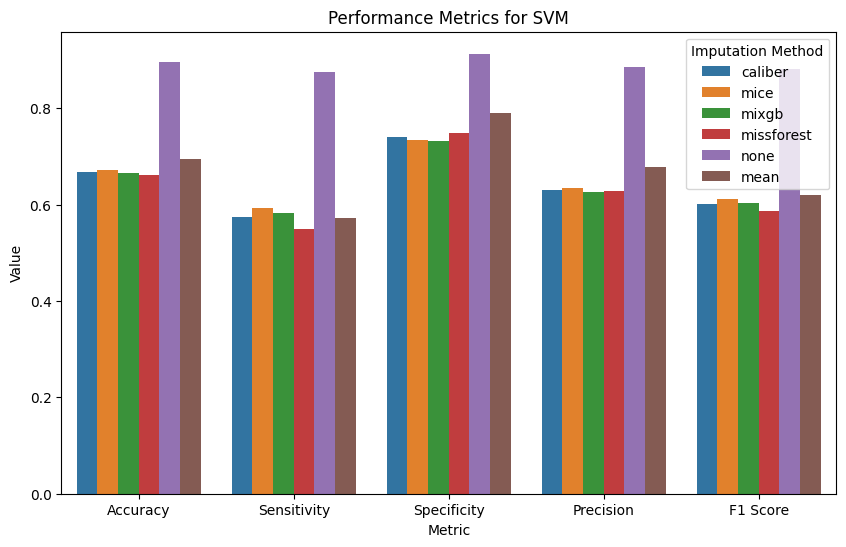

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def run_classification_models(data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)
    models = {'Logistic Regression': LogisticRegression(), 'Random Forest Classifier': RandomForestClassifier(), 'SVM': SVC()}
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {'Accuracy': accuracy_score(y_test, y_pred), 'Sensitivity': recall_score(y_test, y_pred), 'Specificity': calculate_specificity(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}
    return results

class_label = data_missing['class_label']
all_results = {}

for name, dataset in imputed_datasets.items():
    all_results[name] = run_classification_models(dataset, class_label)

# Convert results to DataFrame for visualization
df_results = pd.DataFrame()
for impute_method, models_results in all_results.items():
    for model_name, metrics in models_results.items():
        for metric, value in metrics.items():
            df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_name, 'Metric': metric, 'Value': value}, ignore_index=True)

# # Plotting
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Metric', y='Value', hue='Imputation Method', data=df_results)
# plt.title('Comparison of Classification Models Across Imputation Methods')
# plt.show()
# Function to create plots for each model



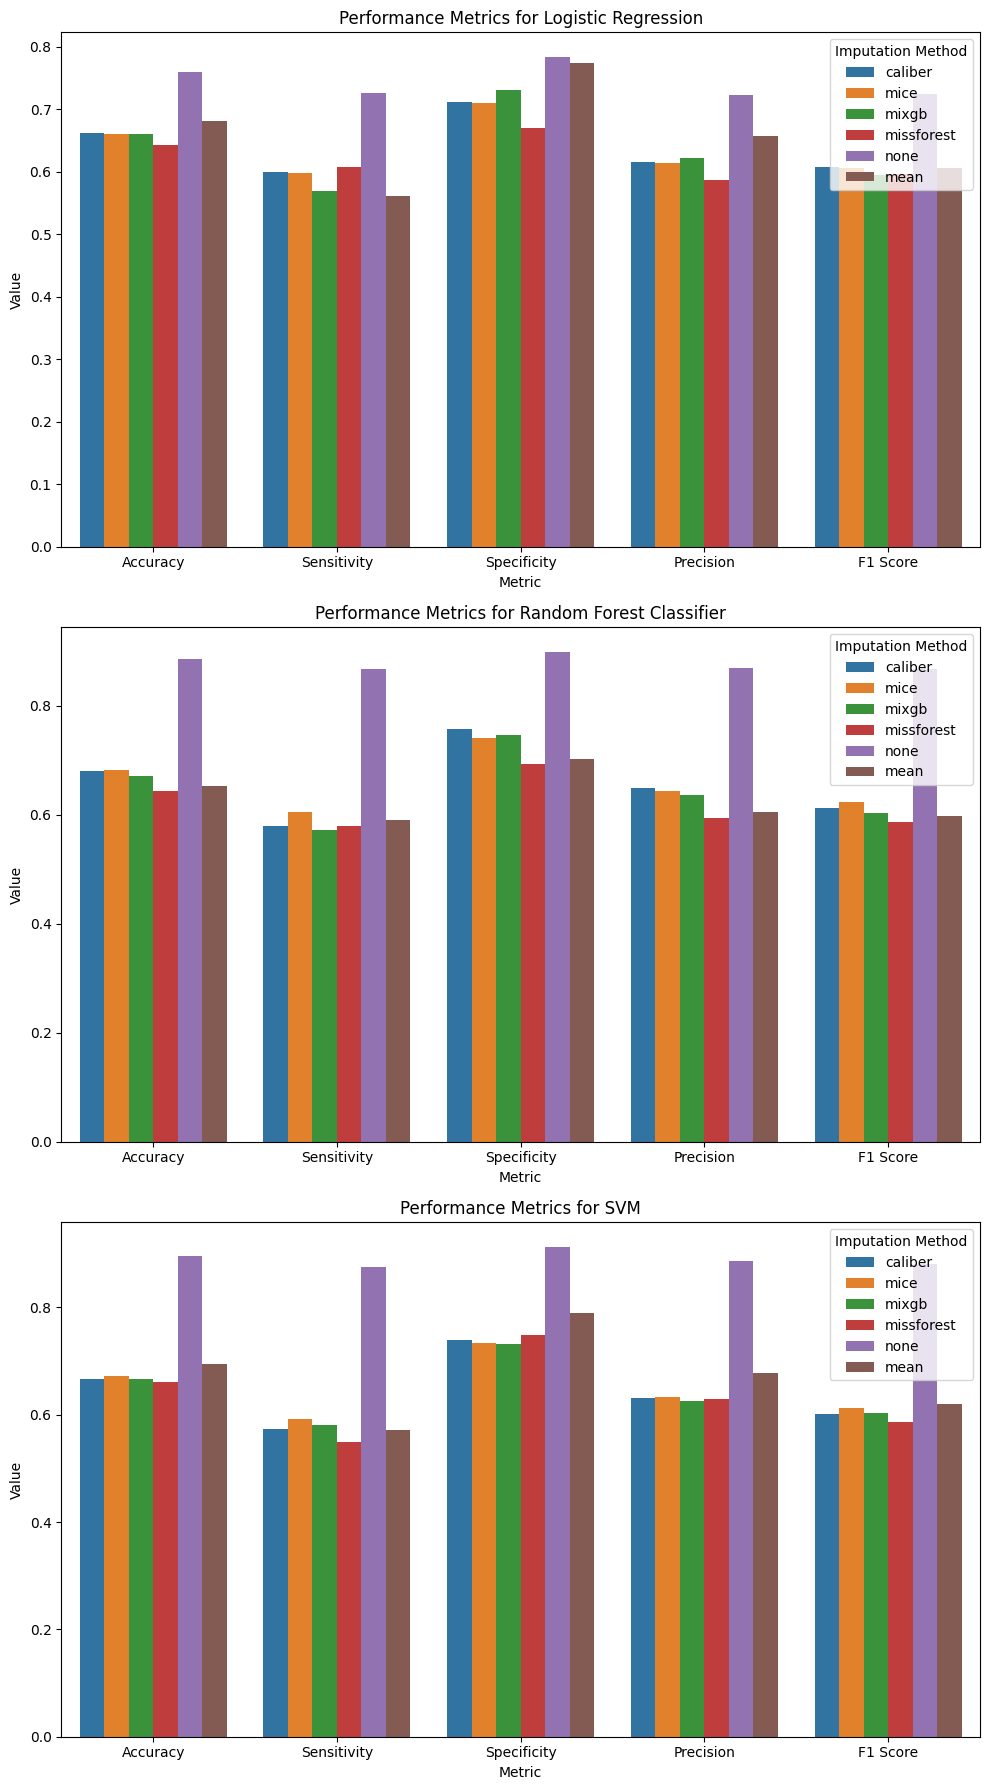

In [40]:
# Create a single figure with subplots for each model
fig, axes = plt.subplots(nrows=len(df_results['Model'].unique()), ncols=1, figsize=(10, 18))

# Function to create plots for each model
def create_plot(model_name, ax):
    model_df = df_results[df_results['Model'] == model_name]
    sns.barplot(x='Metric', y='Value', hue='Imputation Method', data=model_df, ax=ax)
    ax.set_title(f'Performance Metrics for {model_name}')

# Generate plots in subplots
for i, model in enumerate(df_results['Model'].unique()):
    create_plot(model, axes[i])

plt.tight_layout()
plt.savefig('c_comparison_plot.png')
plt.show()
